## Gráficas usadas en la parte Teorica del TFG:

Aqui viene todo el código usado para la creación de cada gráfica.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



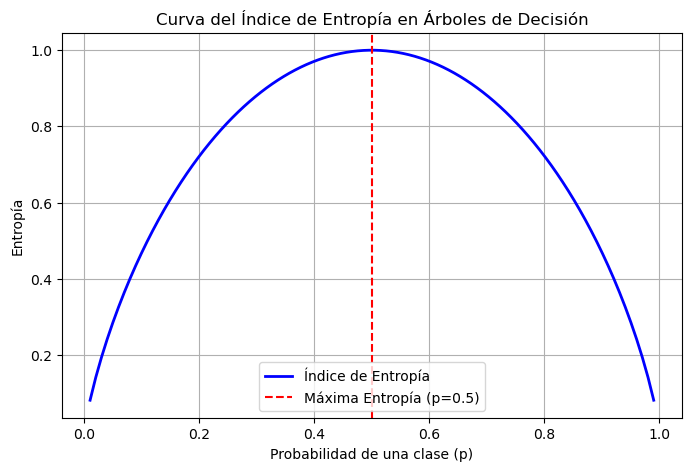

In [5]:
# Definir valores de probabilidad (p)
p = np.linspace(0.01, 0.99, 100)  # Evita log(0) con valores cercanos a 0 y 1

# Calcular la entropía
entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(p, entropy, label='Índice de Entropía', color='b', linewidth=2)
plt.xlabel('Probabilidad de una clase (p)')
plt.ylabel('Entropía')
plt.title('Curva del Índice de Entropía en Árboles de Decisión')
plt.axvline(x=0.5, color='r', linestyle='--', label='Máxima Entropía (p=0.5)')
plt.legend()
plt.grid(True)
plt.show()


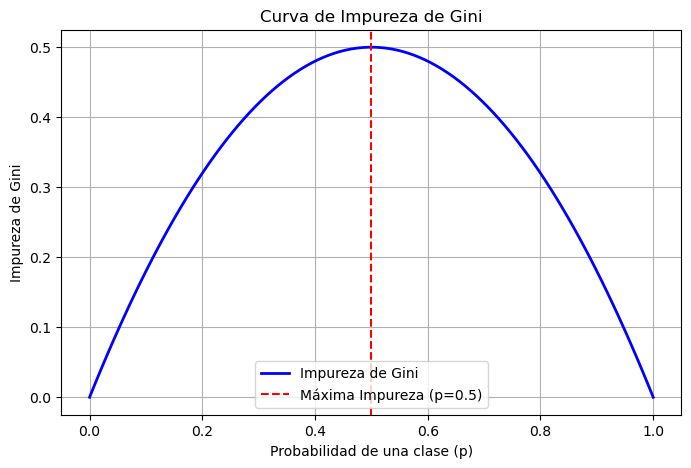

In [6]:
# Definir valores de probabilidad (p)
p = np.linspace(0, 1, 100)

# Calcular impureza de Gini
gini = 1 - (p**2 + (1 - p)**2)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(p, gini, label='Impureza de Gini', color='b', linewidth=2)
plt.xlabel('Probabilidad de una clase (p)')
plt.ylabel('Impureza de Gini')
plt.title('Curva de Impureza de Gini')
plt.axvline(x=0.5, color='r', linestyle='--', label='Máxima Impureza (p=0.5)')
plt.legend()
plt.grid(True)
plt.show()


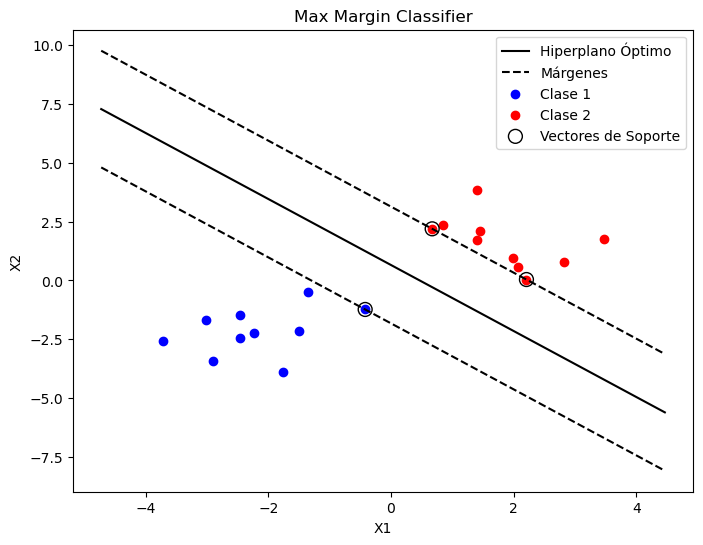

In [2]:
# Generar datos de dos clases
np.random.seed(42)
X1 = np.random.randn(10, 2) + [-2, -2]  # Clase 1
X2 = np.random.randn(10, 2) + [2, 2]    # Clase 2
X = np.vstack((X1, X2))
y = np.hstack((-np.ones(10), np.ones(10)))  # Etiquetas: -1 y 1

# Entrenar un SVM lineal (Max Margin Classifier)
svm = SVC(kernel='linear', C=1e6)  # C grande para maximizar el margen
svm.fit(X, y)

# Obtener coeficientes del hiperplano
w = svm.coef_[0]
b = svm.intercept_[0]

# Crear límites de la gráfica
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)

# Ecuaciones del hiperplano y los márgenes
yy = - (w[0] * xx + b) / w[1]  # Hiperplano
yy_margin_up = yy + 1 / w[1]   # Margen superior
yy_margin_down = yy - 1 / w[1]  # Margen inferior

# Graficar los puntos
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label="Clase 1")
plt.scatter(X2[:, 0], X2[:, 1], color='red', label="Clase 2")

# Graficar el hiperplano y los márgenes
plt.plot(xx, yy, 'k-', label="Hiperplano Óptimo")
plt.plot(xx, yy_margin_up, 'k--', label="Márgenes")
plt.plot(xx, yy_margin_down, 'k--')

# Graficar los vectores de soporte
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label="Vectores de Soporte")

# Etiquetas y leyenda
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Max Margin Classifier")
plt.show()


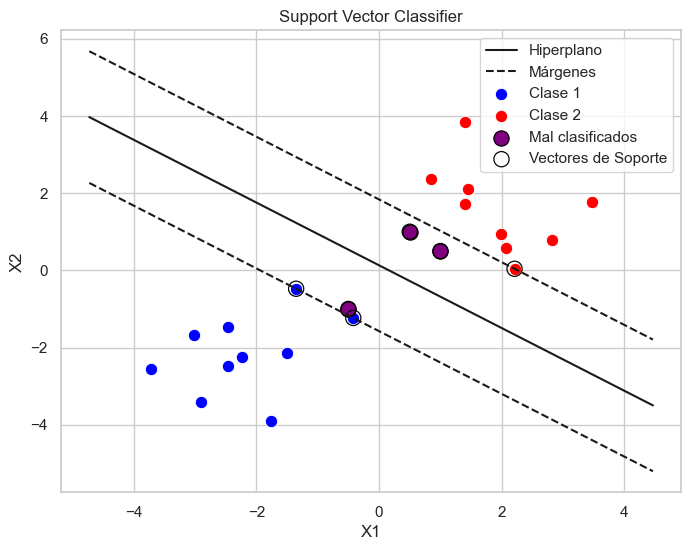

In [5]:
# Generar datos con tres puntos mal clasificados
np.random.seed(42)
X1 = np.random.randn(10, 2) + [-2, -2]  # Clase -1
X2 = np.random.randn(9, 2) + [2, 2]     # Clase 1

# Tres puntos mal clasificados cerca del hiperplano
X_misclassified = np.array([[1.0, 0.5], [0.5, 1.0], [-0.5, -1.0]])
X_linear_mis = np.vstack((X1, X2, X_misclassified))
y_linear_mis = np.hstack((-np.ones(10), np.ones(9), -1, 1, 1))  # Etiquetas

# Entrenar un SVM lineal con margen flexible
svm_linear_mis = SVC(kernel='linear', C=1)
svm_linear_mis.fit(X_linear_mis, y_linear_mis)

# Obtener coeficientes del hiperplano
w_mis = svm_linear_mis.coef_[0]
b_mis = svm_linear_mis.intercept_[0]

# Crear límites de la gráfica
xx = np.linspace(X_linear_mis[:, 0].min() - 1, X_linear_mis[:, 0].max() + 1, 100)

# Ecuaciones del hiperplano y márgenes
yy = - (w_mis[0] * xx + b_mis) / w_mis[1]  # Hiperplano
yy_margin_up = yy + 1 / w_mis[1]   # Margen superior
yy_margin_down = yy - 1 / w_mis[1]  # Margen inferior

# Graficar con Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Graficar puntos de datos
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], color='blue', label="Clase 1", s=80)
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], color='red', label="Clase 2", s=80)

# Graficar los puntos mal clasificados
data_mis = sns.scatterplot(x=X_misclassified[:, 0], y=X_misclassified[:, 1],
                           color='purple', s=120, label="Mal clasificados", edgecolor="black")

# Graficar el hiperplano y márgenes
plt.plot(xx, yy, 'k-', label="Hiperplano")
plt.plot(xx, yy_margin_up, 'k--', label="Márgenes")
plt.plot(xx, yy_margin_down, 'k--')

# Graficar los vectores de soporte
sns.scatterplot(x=svm_linear_mis.support_vectors_[:, 0], y=svm_linear_mis.support_vectors_[:, 1],
                s=120, facecolors='none', edgecolor='black', label="Vectores de Soporte")

# Etiquetas y leyenda
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Support Vector Classifier")
plt.show()


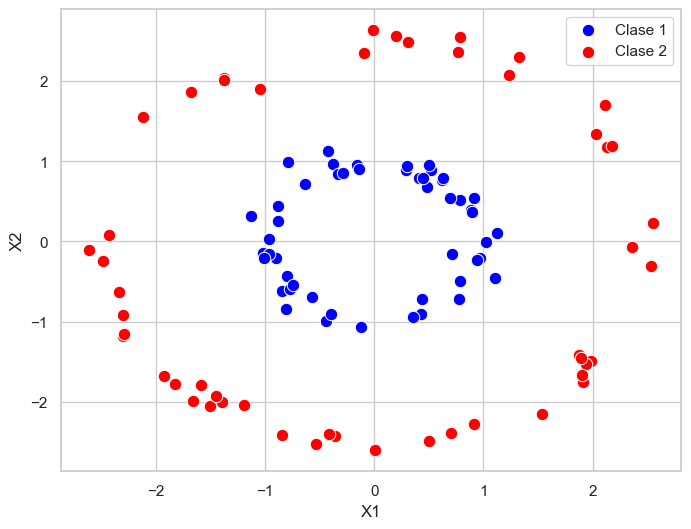

In [7]:
# Generar datos en un patrón circular
np.random.seed(42)
n_samples = 100

# Puntos internos (clase 0) - Círculo pequeño
r_inner = 1.0
angles_inner = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_inner = r_inner * np.cos(angles_inner) + np.random.normal(0, 0.1, n_samples // 2)
y_inner = r_inner * np.sin(angles_inner) + np.random.normal(0, 0.1, n_samples // 2)
X_inner = np.column_stack((x_inner, y_inner))

# Puntos externos (clase 1) - Anillo alrededor
r_outer = 2.5
angles_outer = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_outer = r_outer * np.cos(angles_outer) + np.random.normal(0, 0.1, n_samples // 2)
y_outer = r_outer * np.sin(angles_outer) + np.random.normal(0, 0.1, n_samples // 2)
X_outer = np.column_stack((x_outer, y_outer))

# Crear la figura con Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Graficar los puntos de datos
sns.scatterplot(x=x_inner, y=y_inner, color='blue', label="Clase 1", s=80)
sns.scatterplot(x=x_outer, y=y_outer, color='red', label="Clase 2", s=80)

# Etiquetas y leyenda
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


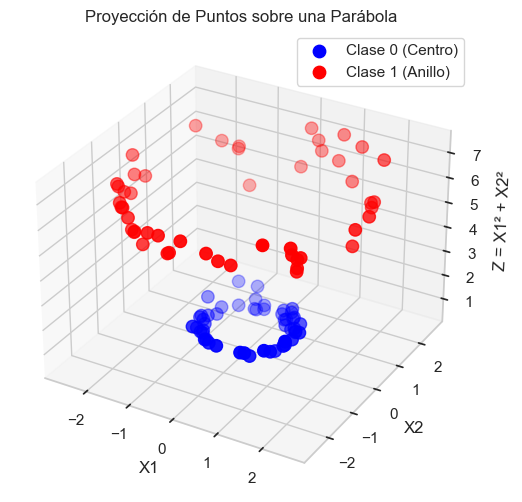

In [8]:
# Generar datos en un patrón circular
np.random.seed(42)
n_samples = 100

# Puntos internos (clase 0) - Círculo pequeño
r_inner = 1.0
angles_inner = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_inner = r_inner * np.cos(angles_inner) + np.random.normal(0, 0.1, n_samples // 2)
y_inner = r_inner * np.sin(angles_inner) + np.random.normal(0, 0.1, n_samples // 2)
X_inner = np.column_stack((x_inner, y_inner))
z_inner = x_inner**2 + y_inner**2  # Proyección parabólica

# Puntos externos (clase 1) - Anillo alrededor
r_outer = 2.5
angles_outer = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_outer = r_outer * np.cos(angles_outer) + np.random.normal(0, 0.1, n_samples // 2)
y_outer = r_outer * np.sin(angles_outer) + np.random.normal(0, 0.1, n_samples // 2)
X_outer = np.column_stack((x_outer, y_outer))
z_outer = x_outer**2 + y_outer**2  # Proyección parabólica

# Crear la figura en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos proyectados
ax.scatter(x_inner, y_inner, z_inner, color='blue', label="Clase 1", s=80)
ax.scatter(x_outer, y_outer, z_outer, color='red', label="Clase 2", s=80)

# Etiquetas y leyenda
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Z = X1² + X2²")
ax.set_title("Proyección de Puntos sobre una Parábola")
ax.legend()
plt.show()


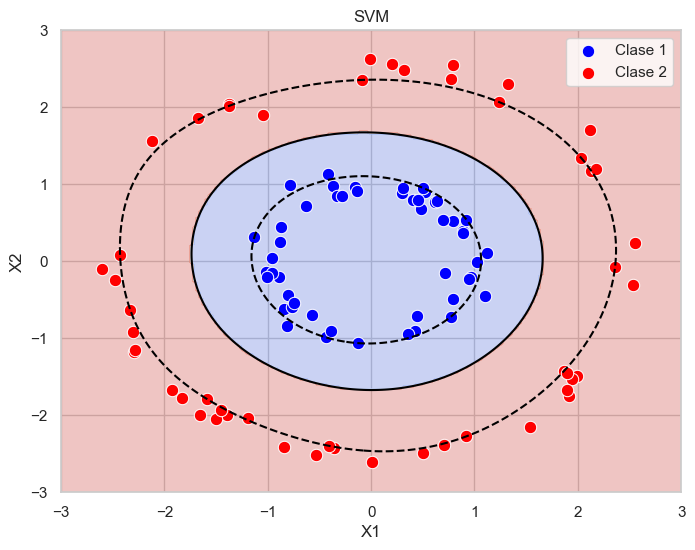

In [3]:
# Generar datos en un patrón circular
np.random.seed(42)
n_samples = 100

# Puntos internos (clase 0) - Círculo pequeño
r_inner = 1.0
angles_inner = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_inner = r_inner * np.cos(angles_inner) + np.random.normal(0, 0.1, n_samples // 2)
y_inner = r_inner * np.sin(angles_inner) + np.random.normal(0, 0.1, n_samples // 2)
X_inner = np.column_stack((x_inner, y_inner))
y_inner_labels = np.zeros(n_samples // 2)  # Etiqueta 0

# Puntos externos (clase 1) - Anillo alrededor
r_outer = 2.5
angles_outer = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_outer = r_outer * np.cos(angles_outer) + np.random.normal(0, 0.1, n_samples // 2)
y_outer = r_outer * np.sin(angles_outer) + np.random.normal(0, 0.1, n_samples // 2)
X_outer = np.column_stack((x_outer, y_outer))
y_outer_labels = np.ones(n_samples // 2)  # Etiqueta 1

# Unir datos
X = np.vstack((X_inner, X_outer))
y = np.hstack((y_inner_labels, y_outer_labels))

# Entrenar un SVM con kernel RBF para capturar la no linealidad
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X, y)

# Crear una malla para visualizar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Crear la figura con Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Dibujar la frontera de decisión y los márgenes
plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['black', 'black', 'black'], linestyles=['dashed', 'solid', 'dashed'])

# Graficar los puntos de datos
sns.scatterplot(x=x_inner, y=y_inner, color='blue', label="Clase 1", s=80)
sns.scatterplot(x=x_outer, y=y_outer, color='red', label="Clase 2", s=80)

# Etiquetas y leyenda
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("SVM")
plt.show()


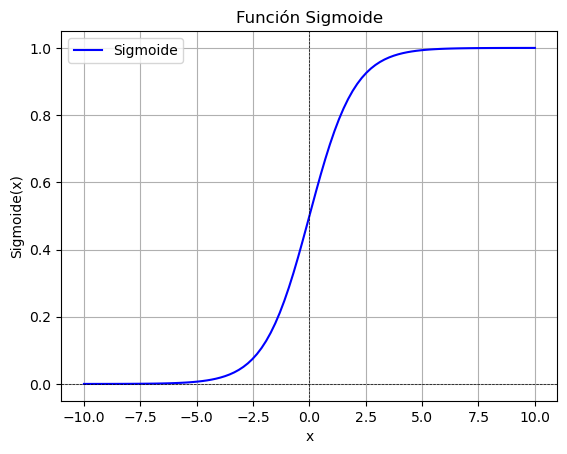

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generar valores de x
x = np.linspace(-10, 10, 100)
# Calcular valores de y usando la función sigmoide
y = sigmoid(x)

# Crear la gráfica
plt.plot(x, y, label='Sigmoide', color='blue')
plt.xlabel('x')
plt.ylabel('Sigmoide(x)')
plt.title('Función Sigmoide')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


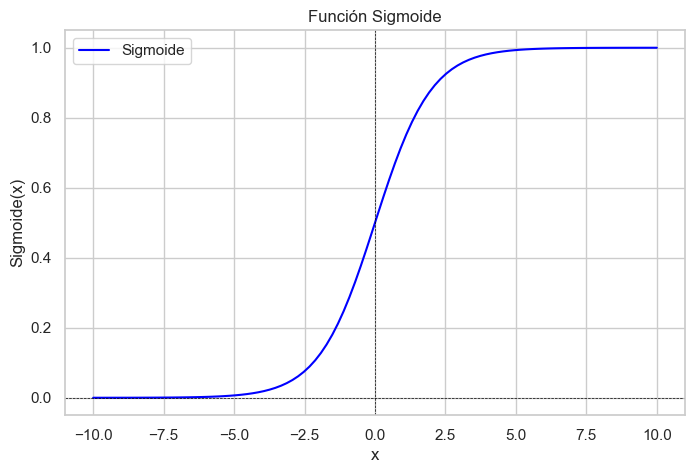

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generar valores de x
x = np.linspace(-10, 10, 100)
# Calcular valores de y usando la función sigmoide
y = sigmoid(x)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(8, 5))
sns.lineplot(x=x, y=y, label='Sigmoide', color='blue')
plt.xlabel('x')
plt.ylabel('Sigmoide(x)')
plt.title('Función Sigmoide')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.show()

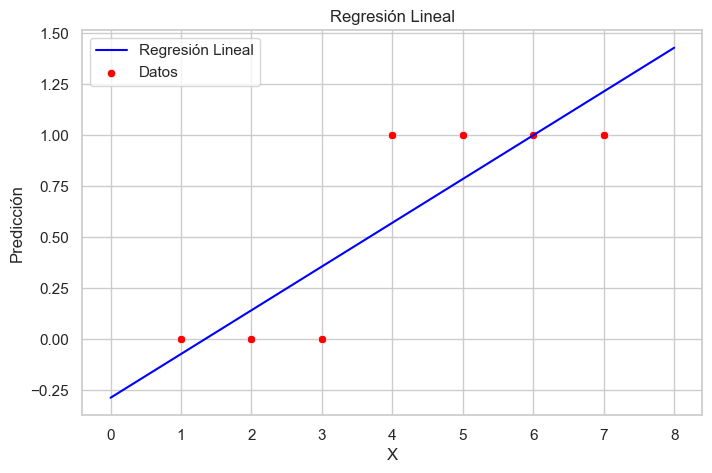

In [9]:
# Datos de entrada (X) y variable objetivo (y)
X = np.array([[1], [2], [3], [4], [5], [6], [7]])  # Variable independiente
y = np.array([0, 0, 0, 1, 1, 1, 1])  # Variable dependiente (0 o 1)

# Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar valores de predicción
x_values = np.linspace(0, 8, 100).reshape(-1, 1)
y_pred = model.predict(x_values)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.flatten(), y=y, color='red', label='Datos')
plt.plot(x_values, y_pred, color='blue', label='Regresión Lineal')
plt.xlabel('X')
plt.ylabel('Predicción')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

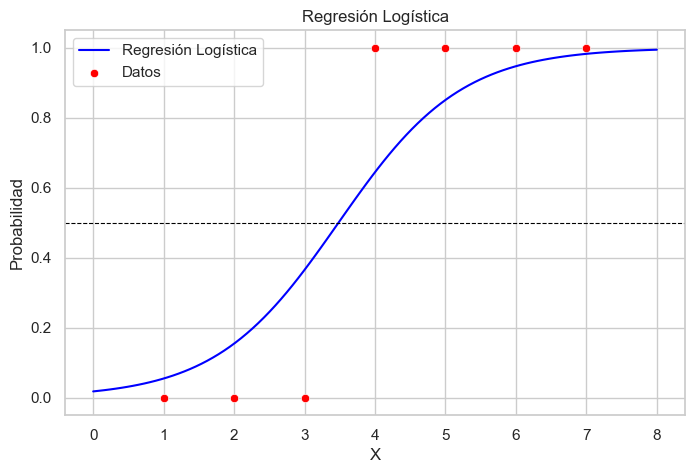

In [4]:
# Datos de entrada (X) y variable objetivo (y)
X = np.array([[1], [2], [3], [4], [5], [6], [7]])  # Variable independiente
y = np.array([0, 0, 0, 1, 1, 1, 1])  # Variable dependiente (0 o 1)

# Ajustar un modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Generar valores de predicción
x_values = np.linspace(0, 8, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_values)[:, 1]

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.flatten(), y=y, color='red', label='Datos')
plt.plot(x_values, y_prob, color='blue', label='Regresión Logística')
plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.axhline(0.5, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

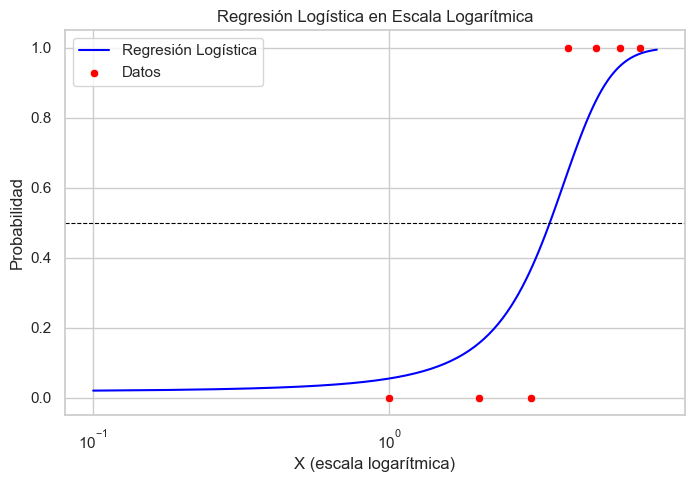

In [10]:
# Datos de entrada (X) y variable objetivo (y)
X = np.array([[1], [2], [3], [4], [5], [6], [7]])  # Variable independiente
y = np.array([0, 0, 0, 1, 1, 1, 1])  # Variable dependiente (0 o 1)

# Ajustar un modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Generar valores de predicción
x_values = np.linspace(0.1, 8, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_values)[:, 1]

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.flatten(), y=y, color='red', label='Datos')
plt.plot(x_values, y_prob, color='blue', label='Regresión Logística')
plt.xscale('log')  # Escala logarítmica en el eje X
plt.xlabel('X (escala logarítmica)')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística en Escala Logarítmica')
plt.axhline(0.5, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

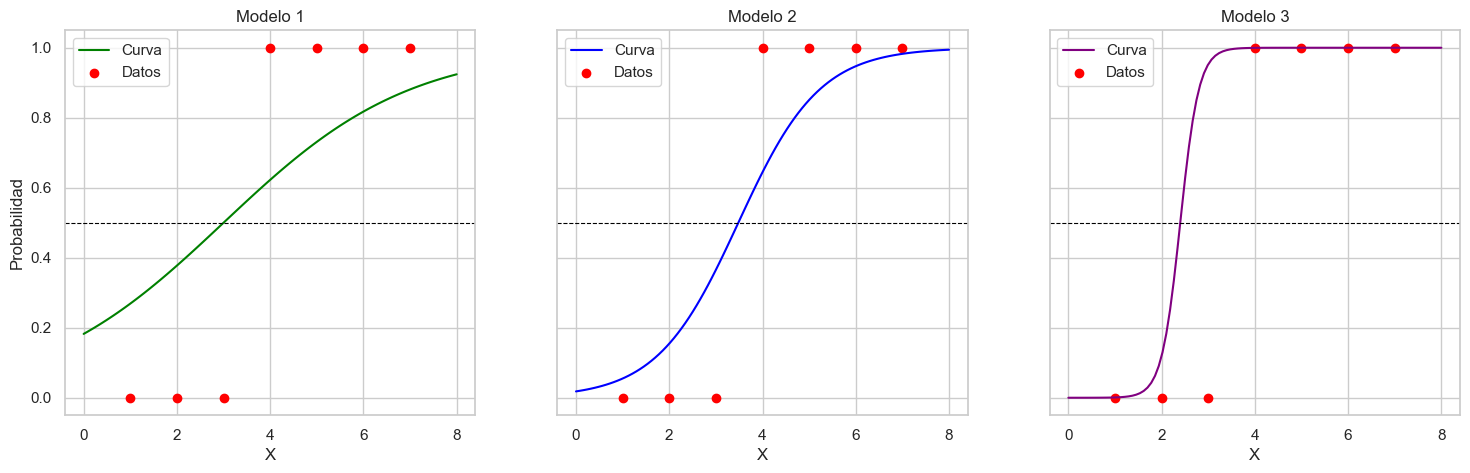

In [5]:
# Datos de entrada (X) y variable objetivo (y)
X = np.array([[1], [2], [3], [4], [5], [6], [7]])  # Variable independiente
y = np.array([0, 0, 0, 1, 1, 1, 1])  # Variable dependiente (0 o 1)

# Modelo óptimo de regresión logística
model_optimal = LogisticRegression()
model_optimal.fit(X, y)

# Modelo subajustado (coeficiente pequeño)
model_underfit = LogisticRegression()
model_underfit.coef_ = np.array([[0.5]])  # Coeficiente manualmente ajustado
model_underfit.intercept_ = np.array([-1.5])

# Modelo sobreajustado (coeficiente grande)
model_overfit = LogisticRegression()
model_overfit.coef_ = np.array([[5]])  # Coeficiente manualmente ajustado
model_overfit.intercept_ = np.array([-12])

# Generar valores de predicción
x_values = np.linspace(0, 8, 100).reshape(-1, 1)
y_prob_optimal = model_optimal.predict_proba(x_values)[:, 1]
y_prob_underfit = 1 / (1 + np.exp(-(model_underfit.coef_[0][0] * x_values + model_underfit.intercept_)))
y_prob_overfit = 1 / (1 + np.exp(-(model_overfit.coef_[0][0] * x_values + model_overfit.intercept_)))

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear figuras separadas
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


# Gráfica subajustada
axes[0].scatter(X.flatten(), y, color='red', label='Datos')
axes[0].plot(x_values, y_prob_underfit, color='green', label='Curva')
axes[0].axhline(0.5, color='black', linestyle='--', linewidth=0.8)
axes[0].set_title('Modelo 1')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Probabilidad')
axes[0].legend()

# Gráfica óptima
axes[1].scatter(X.flatten(), y, color='red', label='Datos')
axes[1].plot(x_values, y_prob_optimal, color='blue', label='Curva')
axes[1].axhline(0.5, color='black', linestyle='--', linewidth=0.8)
axes[1].set_title('Modelo 2')
axes[1].set_xlabel('X')
axes[1].legend()


# Gráfica sobreajustada
axes[2].scatter(X.flatten(), y, color='red', label='Datos')
axes[2].plot(x_values, y_prob_overfit, color='purple', label='Curva')
axes[2].axhline(0.5, color='black', linestyle='--', linewidth=0.8)
axes[2].set_title('Modelo 3')
axes[2].set_xlabel('X')
axes[2].legend()

# Mostrar gráficas
plt.show()


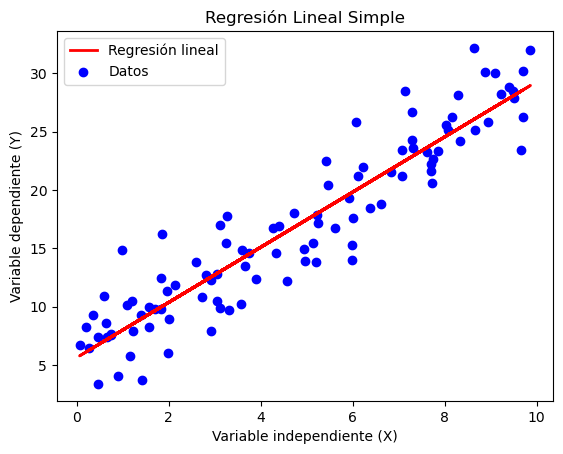

In [1]:
# Generar datos simulados
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # Variable independiente
y = 2.5 * x + 5 + np.random.randn(100, 1) * 3  # Variable dependiente con ruido

# Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Graficar los datos y la recta de regresión
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (Y)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


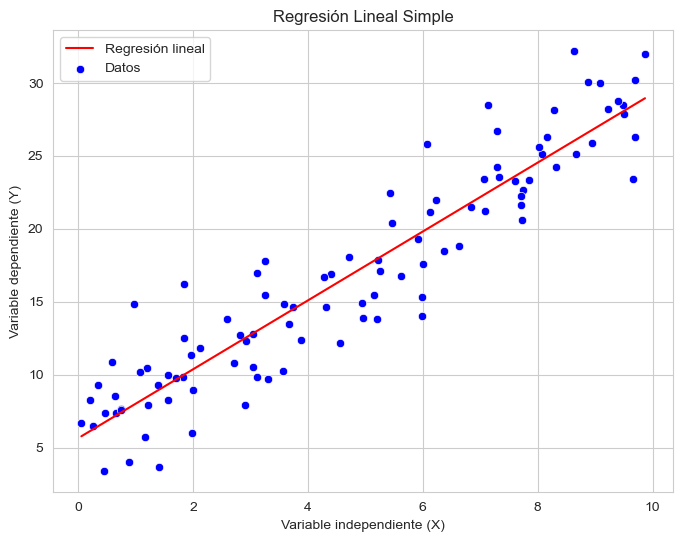

In [3]:
# Generar datos 
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # Variable independiente
y = 2.5 * x + 5 + np.random.randn(100, 1) * 3  # Variable dependiente con ruido

# Modelo de regresión lineal
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Crear un DataFrame
import pandas as pd
df = pd.DataFrame({'X': x.flatten(), 'Y': y.flatten(), 'Y_Pred': y_pred.flatten()})

# Graficar con Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(x='X', y='Y', data=df, color='blue', label='Datos')
sns.lineplot(x='X', y='Y_Pred', data=df, color='red', label='Regresión lineal')
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (Y)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


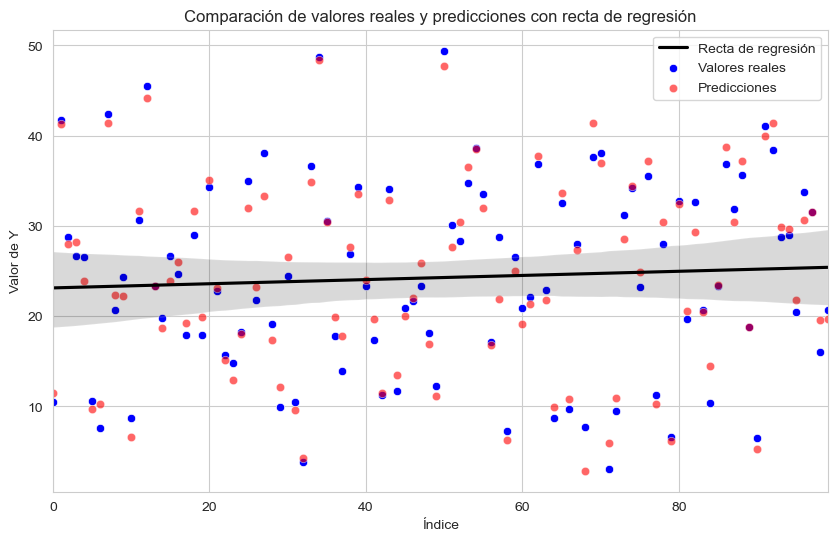

In [14]:
# Generamos datos de ejemplo
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Primera variable independiente
X2 = np.random.rand(100, 1) * 10  # Segunda variable independiente
Y = 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 2  # Variable dependiente con ruido

# Creamos un DataFrame
df = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'Y': Y.flatten()})

# Ajustamos un modelo de regresión lineal múltiple
model = LinearRegression()
X = df[['X1', 'X2']]
y = df['Y']
model.fit(X, y)

# Hacemos predicciones
df['Y_pred'] = model.predict(X)

# Gráfica de las predicciones con Seaborn incluyendo la recta de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Y'], label='Valores reales', color='blue')
sns.scatterplot(x=df.index, y=df['Y_pred'], label='Predicciones', color='red', alpha=0.6)
sns.regplot(x=df.index, y=df['Y_pred'], scatter=False, color='black', label='Recta de regresión')
plt.xlabel('Índice')
plt.ylabel('Valor de Y')
plt.title('Comparación de valores reales y predicciones con recta de regresión')
plt.legend()
plt.show()


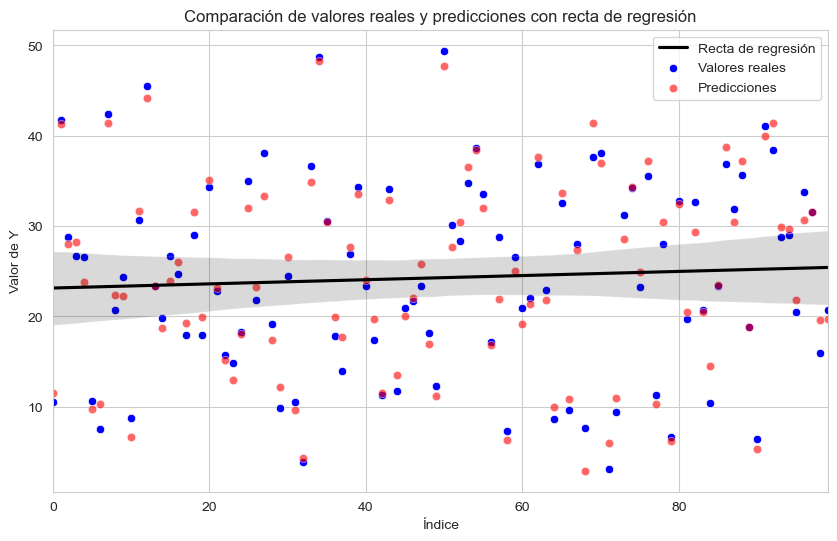

In [15]:
# Generamos datos de ejemplo
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Primera variable independiente
X2 = np.random.rand(100, 1) * 10  # Segunda variable independiente
Y = 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 2  # Variable dependiente con ruido

# Creamos un DataFrame
df = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'Y': Y.flatten()})

# Ajustamos un modelo de regresión lineal múltiple
model = Ridge()
X = df[['X1', 'X2']]
y = df['Y']
model.fit(X, y)

# Hacemos predicciones
df['Y_pred'] = model.predict(X)

# Gráfica de las predicciones con Seaborn incluyendo la recta de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Y'], label='Valores reales', color='blue')
sns.scatterplot(x=df.index, y=df['Y_pred'], label='Predicciones', color='red', alpha=0.6)
sns.regplot(x=df.index, y=df['Y_pred'], scatter=False, color='black', label='Recta de regresión')
plt.xlabel('Índice')
plt.ylabel('Valor de Y')
plt.title('Comparación de valores reales y predicciones con recta de regresión')
plt.legend()
plt.show()

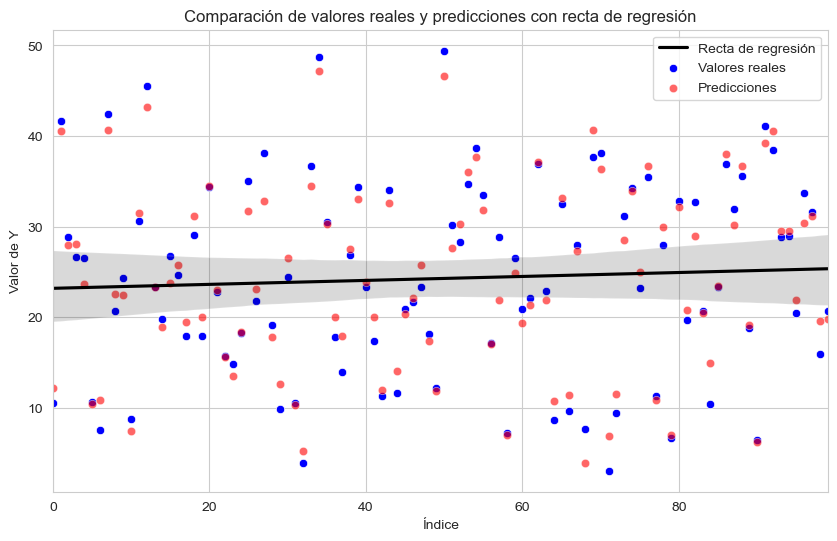

In [16]:
# Generamos datos de ejemplo
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Primera variable independiente
X2 = np.random.rand(100, 1) * 10  # Segunda variable independiente
Y = 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 2  # Variable dependiente con ruido

# Creamos un DataFrame
df = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'Y': Y.flatten()})

# Ajustamos un modelo de regresión lineal múltiple
model = Lasso()
X = df[['X1', 'X2']]
y = df['Y']
model.fit(X, y)

# Hacemos predicciones
df['Y_pred'] = model.predict(X)

# Gráfica de las predicciones con Seaborn incluyendo la recta de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Y'], label='Valores reales', color='blue')
sns.scatterplot(x=df.index, y=df['Y_pred'], label='Predicciones', color='red', alpha=0.6)
sns.regplot(x=df.index, y=df['Y_pred'], scatter=False, color='black', label='Recta de regresión')
plt.xlabel('Índice')
plt.ylabel('Valor de Y')
plt.title('Comparación de valores reales y predicciones con recta de regresión')
plt.legend()
plt.show()

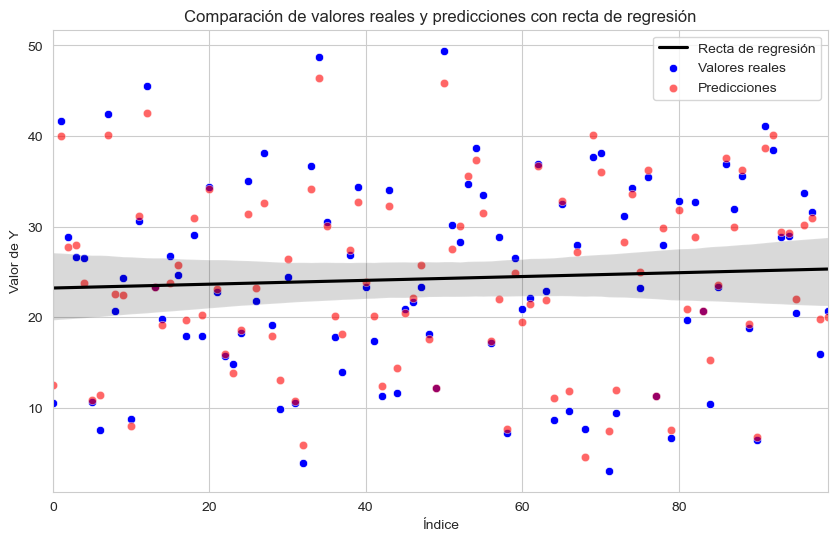

In [17]:
# Generamos datos de ejemplo
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Primera variable independiente
X2 = np.random.rand(100, 1) * 10  # Segunda variable independiente
Y = 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 2  # Variable dependiente con ruido

# Creamos un DataFrame
df = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'Y': Y.flatten()})

# Ajustamos un modelo de regresión lineal múltiple
model = ElasticNet()
X = df[['X1', 'X2']]
y = df['Y']
model.fit(X, y)

# Hacemos predicciones
df['Y_pred'] = model.predict(X)

# Gráfica de las predicciones con Seaborn incluyendo la recta de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Y'], label='Valores reales', color='blue')
sns.scatterplot(x=df.index, y=df['Y_pred'], label='Predicciones', color='red', alpha=0.6)
sns.regplot(x=df.index, y=df['Y_pred'], scatter=False, color='black', label='Recta de regresión')
plt.xlabel('Índice')
plt.ylabel('Valor de Y')
plt.title('Comparación de valores reales y predicciones con recta de regresión')
plt.legend()
plt.show()

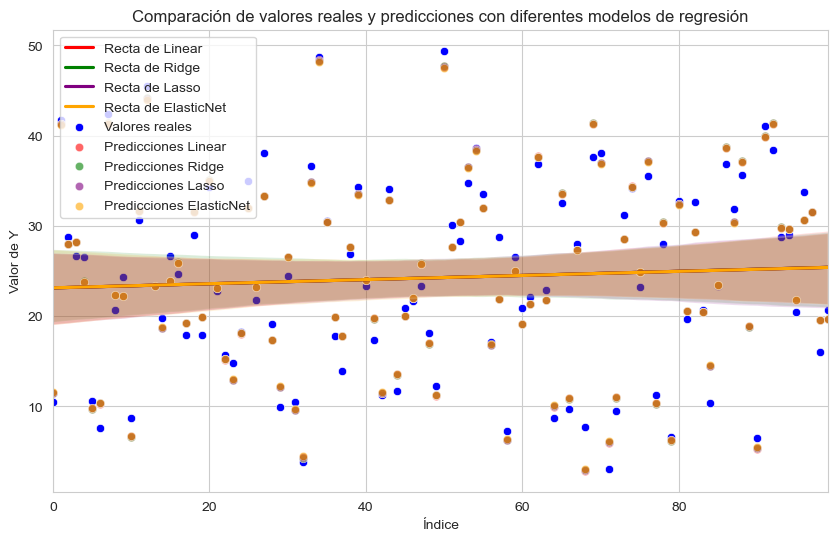

In [19]:
# Generamos datos de ejemplo
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Primera variable independiente
X2 = np.random.rand(100, 1) * 10  # Segunda variable independiente
Y = 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 2  # Variable dependiente con ruido

# Creamos un DataFrame
df = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'Y': Y.flatten()})

# Definimos los modelos
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

X = df[['X1', 'X2']]
y = df['Y']

# Entrenamos los modelos y almacenamos las predicciones
for name, model in models.items():
    model.fit(X, y)
    df[f'Y_pred_{name}'] = model.predict(X)
    

# Gráfica de las predicciones con Seaborn incluyendo la recta de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Y'], label='Valores reales', color='blue')

colors = {'Linear': 'red', 'Ridge': 'green', 'Lasso': 'purple', 'ElasticNet': 'orange'}
for name, color in colors.items():
    sns.scatterplot(x=df.index, y=df[f'Y_pred_{name}'], label=f'Predicciones {name}', color=color, alpha=0.6)
    sns.regplot(x=df.index, y=df[f'Y_pred_{name}'], scatter=False, color=color, label=f'Recta de {name}')

plt.xlabel('Índice')
plt.ylabel('Valor de Y')
plt.title('Comparación de valores reales y predicciones con diferentes modelos de regresión')
plt.legend()
plt.show()
